# Principal Component Analysis with Cancer Data

In [10]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [47]:
bc_df=pd.read_csv("breast-cancer-wisconsin-data.csv")
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [16]:
bc_df.shape

(699, 11)

In [20]:
bc_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [21]:
bc_df["Bare Nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [34]:
rep_val=bc_df["Bare Nuclei"].mode()[0]

In [41]:
bc_df_new["Bare Nuclei"]=bc_df["Bare Nuclei"].replace("?",rep_val)

In [43]:
bc_df_new["Bare Nuclei"].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [46]:
bc_df_new.shape
bc_df_new.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [48]:
# We could see "?" values in column, this should be removed from data set
bc_df.info()

# Check for missing value in any other column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [49]:
rep_val=bc_df["Bare Nuclei"].mode()[0]

In [50]:
bc_df_new["Bare Nuclei"]=bc_df["Bare Nuclei"].replace("?",rep_val)

In [52]:
# No missing values found. So let us try to remove ? from bare nuclei column
bc_df_new.isna().sum(0)
# Get count of rows having ?


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [53]:
bc_df_new.duplicated().value_counts()

False    690
True       9
dtype: int64

In [55]:
df_bc=bc_df_new.drop_duplicates()
df_bc.duplicated().value_counts()

False    690
dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# They are imputed with mode.

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [58]:
df_bc.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.620526,0.633880,0.482517,0.681063
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.343769,0.427490,1.000000,0.423947
Class,-0.080084,0.716812,0.817586,0.817551,0.701175,0.681063,0.756736,0.715363,0.423947,1.000000


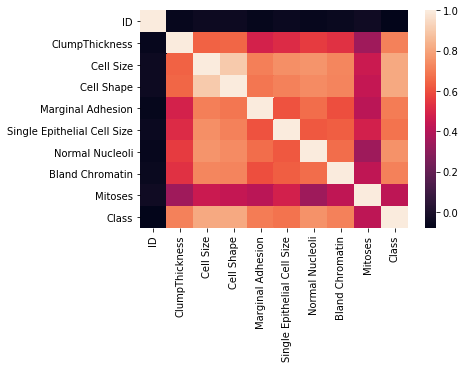

In [59]:
sns.heatmap(df_bc.corr())

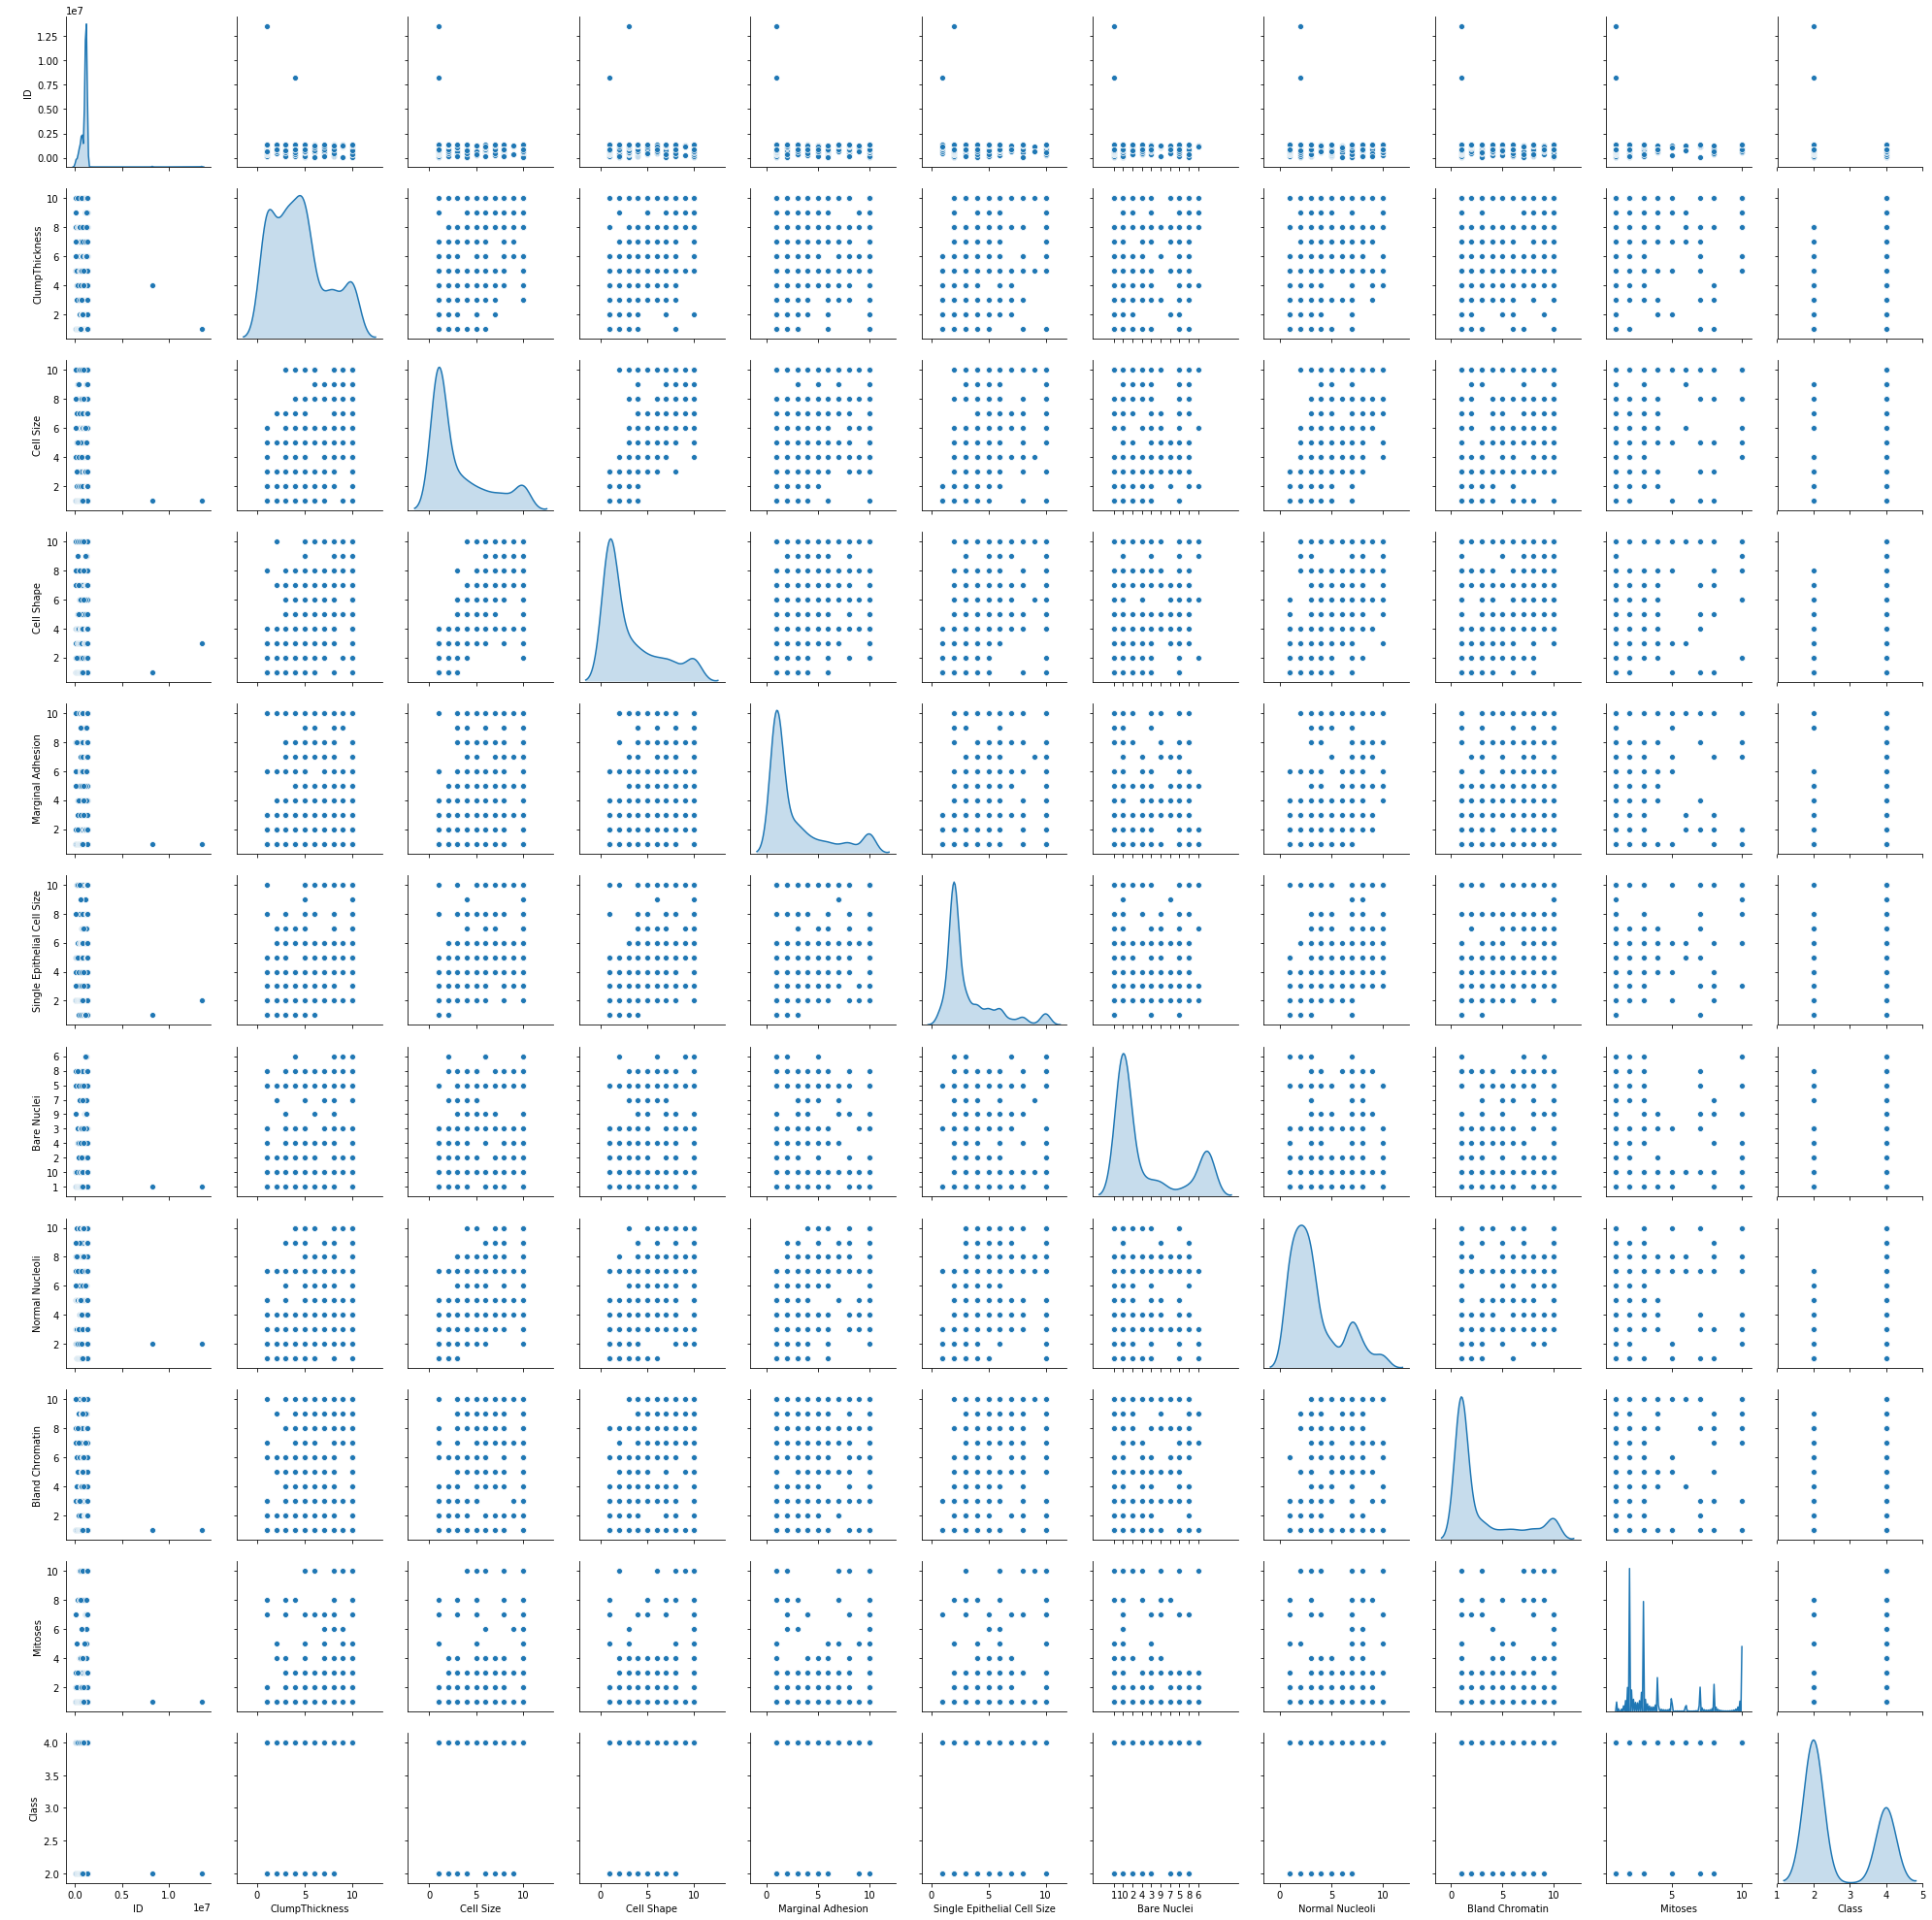

In [57]:
# Check for correlation of variable
import seaborn as sns
sns.pairplot(df_bc,diag_kind='kde')

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [64]:
df_bc.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

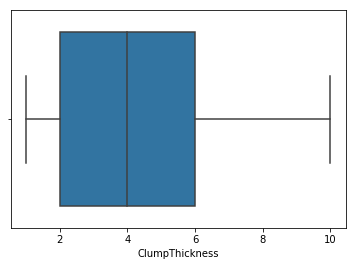

In [75]:
sns.boxplot(df_bc['ClumpThickness'])


In [ ]:
sns.boxplot(df_bc['Cell Size'])

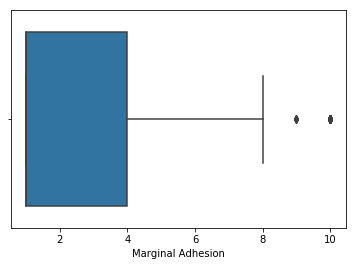

In [76]:
sns.boxplot(df_bc['Marginal Adhesion'])

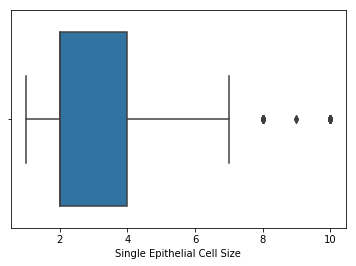

In [77]:
sns.boxplot(df_bc['Single Epithelial Cell Size'])

C:\Users\Shivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


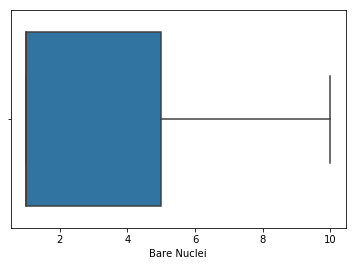

In [89]:
df_bc['Bare Nuclei']=df_bc['Bare Nuclei'].astype('int64')
sns.boxplot(df_bc['Bare Nuclei'])

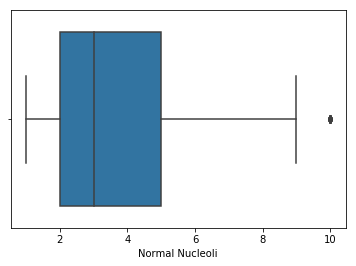

In [79]:
sns.boxplot(df_bc['Normal Nucleoli'])

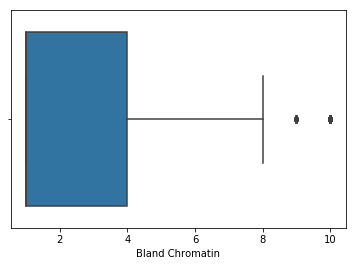

In [80]:
sns.boxplot(df_bc['Bland Chromatin'])

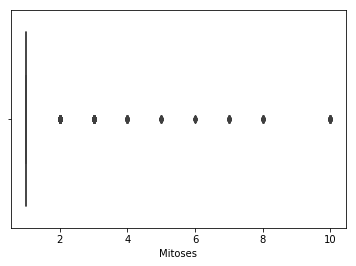

In [81]:
sns.boxplot(df_bc['Mitoses'])

In [91]:
pd.crosstab(df_bc['Marginal Adhesion'],df_bc['Class'])
pd.crosstab(df_bc['Single Epithelial Cell Size'],df_bc['Class'])
pd.crosstab(df_bc['Normal Nucleoli'],df_bc['Class'])
pd.crosstab(df_bc[''Bland Chromatin'],df_bc['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [98]:
df_bc['Marginal Adhesion']=np.where(df_bc['Marginal Adhesion']>8,8,df_bc['Marginal Adhesion'])
df_bc['Single Epithelial Cell Size']=np.where(df_bc['Single Epithelial Cell Size']>7,7,df_bc['Marginal Adhesion'])
df_bc['Normal Nucleoli']=np.where(df_bc['Normal Nucleoli']>8,8,df_bc['Normal Nucleoli'])
df_bc['Bland Chromatin']=np.where(df_bc['Bland Chromatin']>8,8,df_bc['Bland Chromatin'])
df_bc['Mitoses']=np.where(df_bc['Mitoses']>1,1,df_bc['Mitoses'])

C:\Users\Shivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Shivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shivak\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

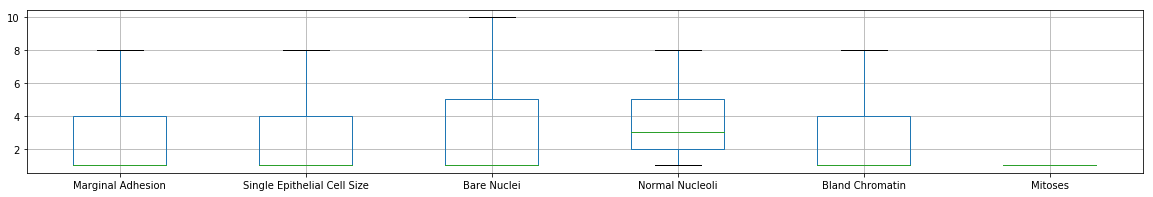

In [99]:
df_bc.boxplot(figsize=(20,3),column=['Marginal Adhesion','Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin','Mitoses'])
df_bc=df_bc['ID'].drop

# Q6 Create a covariance matrix for identifying Principal components

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


scaled_df = sc.fit_transform(df_bc)  # scale training and test data independently to prevent data leaks


C:\Users\Shivak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shivak\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=np.cov(scaled_df.T)

Cumulative Variance Explained [ 66.72849863  76.70605339  83.02552561  87.60757288  91.30062211
  94.38128946  97.22864459  98.52653444  99.43748785 100.
 100.        ]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [116]:
eigval,eigenvec=np.linalg.eig(cov_matrix)
print(eigval,eigenvec)
eig_vals=eigval



[6.6825347  0.9992036  0.63286442 0.45886976 0.05633286 0.09122755
 0.12997736 0.36984092 0.30851386 0.28514877 0.        ] [[-0.03268686  0.99630572  0.01731734 -0.04704951 -0.01065309 -0.00115713
  -0.00336909 -0.04646825  0.03869824 -0.00314753  0.        ]
 [ 0.28624808 -0.00775316  0.65568695 -0.40889143 -0.02549857 -0.02248701
   0.16706379  0.45244834  0.18209536 -0.23227134  0.        ]
 [ 0.3532624   0.0463832   0.06459684  0.24995511 -0.07893418 -0.72335461
   0.00253604  0.15924853 -0.45564547  0.20964767  0.        ]
 [ 0.35086172  0.04512825  0.12523377  0.22439554  0.01827133  0.66439161
   0.21139364  0.10596404 -0.45153145  0.32753058  0.        ]
 [ 0.33181723  0.01215483 -0.54376184 -0.20702224 -0.67189872  0.08754975
  -0.00675255  0.26984336  0.09159017 -0.10417199  0.        ]
 [ 0.34237498  0.02812774 -0.46868877 -0.18686317  0.73439069 -0.01969247
  -0.00137012  0.28132567  0.08365478 -0.03923755  0.        ]
 [ 0.32435086 -0.04286536  0.0023805  -0.43851359 -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [118]:
cov_matrix=np.cov(scaled_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00145138 -0.05967872 -0.04391921 -0.042865   -0.06492233 -0.05212503
  -0.0919656  -0.06339574 -0.06090072  0.         -0.08019994]
 [-0.05967872  1.00145138  0.64410677  0.65453792  0.50566766  0.54860116
   0.59150555  0.57406936  0.54895554  0.          0.71785261]
 [-0.04391921  0.64410677  1.00145138  0.9066632   0.73190433  0.76944853
   0.68556472  0.75829256  0.7322064   0.          0.81877246]
 [-0.042865    0.65453792  0.9066632   1.00145138  0.70664526  0.74286074
   0.70518656  0.73948297  0.72768806  0.          0.8187375 ]
 [-0.06492233  0.50566766  0.73190433  0.70664526  1.00145138  0.94220976
   0.68919517  0.68740749  0.6334195   0.          0.72329692]
 [-0.05212503  0.54860116  0.76944853  0.74286074  0.94220976  1.00145138
   0.71088281  0.69958904  0.66425126  0.          0.75488067]
 [-0.0919656   0.59150555  0.68556472  0.70518656  0.68919517  0.71088281
   1.00145138  0.68571135  0.60106392  0.          0.81784066]
 [-0.06339574  0.57

In [120]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 66.72849863  76.70605339  83.02552561  87.60757288  91.30062211
  94.38128946  97.22864459  98.52653444  99.43748785 100.
 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [129]:
new_df =df_bc.iloc[:,1:10]

In [127]:
new_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [131]:
pca.components_

array([[-0.03268686,  0.28624808,  0.3532624 ,  0.35086172,  0.33181723,
         0.34237498,  0.32435086,  0.33006044,  0.31553449, -0.        ,
         0.357864  ],
       [ 0.99630572, -0.00775316,  0.0463832 ,  0.04512825,  0.01215483,
         0.02812774, -0.04286536,  0.00799851,  0.01292412,  0.        ,
        -0.01093091],
       [ 0.01731734,  0.65568695,  0.06459684,  0.12523377, -0.54376184,
        -0.46868877,  0.0023805 ,  0.00821845,  0.06926174,  0.        ,
         0.17234266],
       [ 0.04704951,  0.40889143, -0.24995511, -0.22439554,  0.20702224,
         0.18686317,  0.43851359, -0.1992639 , -0.6285255 , -0.        ,
         0.11376552],
       [-0.04646825,  0.45244834,  0.15924853,  0.10596404,  0.26984336,
         0.28132567, -0.63475852, -0.39588136,  0.0065139 , -0.        ,
        -0.21189691],
       [-0.03869824, -0.18209536,  0.45564547,  0.45153145, -0.09159017,
        -0.08365478, -0.13451886,  0.20994347, -0.68830914,  0.        ,
        -0.050

In [136]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(new_df)
pca.fit_transform(new_df)

array([[-4.42152683e+00,  9.03997467e-01,  1.48337287e+00, ...,
         8.33458258e-03, -2.77085607e-02,  0.00000000e+00],
       [ 4.94008301e+00, -5.07286803e+00,  1.31949348e+00, ...,
         3.08170794e-01, -1.18411155e-01,  0.00000000e+00],
       [-4.57630254e+00, -5.79559213e-01,  4.75479570e-01, ...,
         5.63048486e-02,  9.91102221e-03, -0.00000000e+00],
       ...,
       [ 8.56661145e+00,  6.17061193e+00, -2.80438381e+00, ...,
        -2.29495295e-01, -3.32170896e-01,  0.00000000e+00],
       [ 6.33041843e+00,  2.35428740e+00, -2.89426287e+00, ...,
         1.06321401e+00, -1.50148910e-01,  0.00000000e+00],
       [ 7.59065310e+00,  1.28271332e+00, -2.98660379e+00, ...,
        -3.75707756e-01, -8.24591333e-02,  0.00000000e+00]])

# Q10 Find correlation between components and features

In [135]:
df_comp=pd.DataFrame(pca.components_,columns=list(new_df))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.305006,0.408203,0.395836,0.308227,0.327111,0.455237,0.278718,0.311006,-0.0
1,0.380445,0.316097,0.288685,-0.214839,-0.174127,-0.722667,0.033250,0.268656,-0.0
2,0.705801,-0.157186,-0.065649,-0.385849,-0.349956,0.403708,-0.063874,-0.185527,0.0
3,0.485161,-0.142412,-0.216127,0.475846,0.451293,-0.298202,-0.138799,-0.399177,0.0
4,0.167612,-0.425274,-0.438491,0.082961,0.069222,-0.027469,0.084878,0.761013,-0.0
5,0.002306,-0.054971,-0.191722,-0.025257,-0.086110,-0.117207,0.938519,-0.240016,0.0
6,0.007790,0.708578,-0.692763,-0.072290,-0.011719,0.063551,-0.090906,0.016469,0.0
7,-0.023188,-0.050022,0.001483,-0.686138,0.724016,-0.008756,0.039748,-0.017800,-0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [137]:
df_jokes=pd.read_csv("jokes.csv")
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [138]:
ratings=df_jokes.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [139]:
ratings.replace(99.00,0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [141]:
ratings_diff=ratings.mean()
ratings_diff.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [142]:
ratings_diff.sort_values(ascending=False).head(10)


Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64